In [ ]:
import tensorflow as tf


tf.__version__

'2.5.0'

In [ ]:
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
base_dir = '/content/gdrive/MyDrive/TD3BRGB/classesjpeg'
path=Path(base_dir)

Mounted at /content/gdrive


In [ ]:
class1 = Path('/content/gdrive/MyDrive/TD3BRGB/classes/1')
fp = list(class1.iterdir())[0]

In [ ]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 1.1 MB/s 


In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

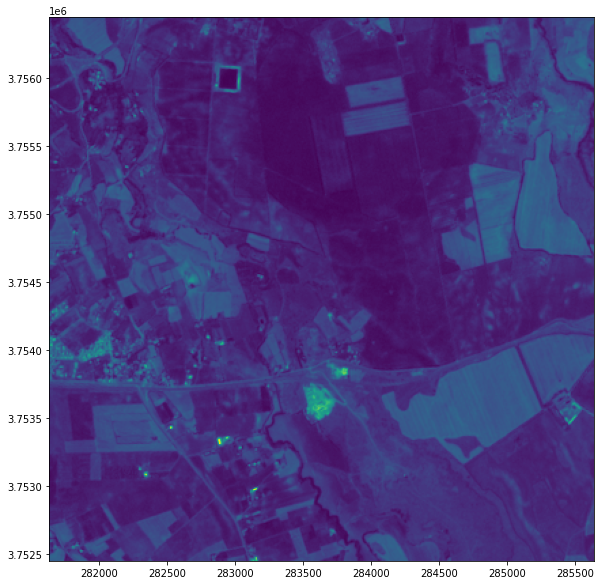

In [ ]:
img = rasterio.open(fp)
plt.figure(figsize = (20,10))
show(img)

In [ ]:
array = img.read()

In [ ]:
array.reshape(-1).shape

(481200,)

In [ ]:
from PIL import Image
img = Image.fromarray(array, 'RGB')
#img.save('my.png')
img.show()

In [ ]:
%tensorflow_version 1.x
import tensorflow.keras as K

TensorFlow 1.x selected.


In [ ]:
!pip install fastai --upgrade -q

     |████████████████████████████████| 188 kB 8.0 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 


In [ ]:
from fastai.vision.all import *

In [ ]:
classes = DataBlock(blocks=(ImageBlock, CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   splitter=RandomSplitter(valid_pct=0.2, seed=42),
   item_tfms=RandomResizedCrop(224, min_scale=0.5),
   batch_tfms=aug_transforms())

In [ ]:
dls = classes.dataloaders(path, verbose=True)

Found 480 items
2 datasets of sizes 384,96
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: RandomResizedCrop -- {'size': (224, 224), 'min_scale': 0.5, 'ratio': (0.75, 1.3333333333333333), 'resamples': (2, 0), 'val_xtra': 0.14, 'max_scale': 1.0, 'p': 1.0} -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Flip -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5} -> Brightness -- {'max_lighting': 0.2, 'p': 1.0, 'draw': None, 'batch': False}


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


In [ ]:
path = '/content/drive/MyDrive/image_nightlights'

In [ ]:
dls = classes.dataloaders(path, verbose=True)

Found 480 items
2 datasets of sizes 384,96
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: RandomResizedCrop -- {'size': (224, 224), 'min_scale': 0.5, 'ratio': (0.75, 1.3333333333333333), 'resamples': (2, 0), 'val_xtra': 0.14, 'max_scale': 1.0, 'p': 1.0} -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Flip -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5} -> Brightness -- {'max_lighting': 0.2, 'p': 1.0, 'draw': None, 'batch': False}


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


In [ ]:
dls.vocab

['1', '2', '3', '4', '5']

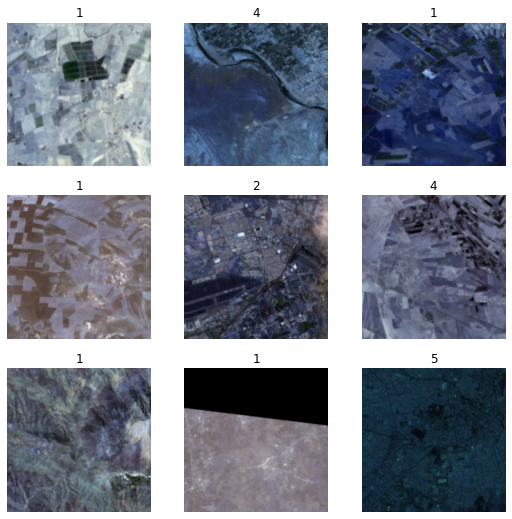

In [ ]:
dls.train.show_batch(max_n=9, nrows = 3)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(10, 3e-5)

epoch,train_loss,valid_loss,accuracy,time
0,1.850294,1.382092,0.395833,00:03
1,1.848534,1.345437,0.427083,00:03
2,1.838774,1.289580,0.458333,00:03
3,1.822479,1.252413,0.500000,00:03
4,1.804737,1.222162,0.489583,00:03
5,1.781038,1.191822,0.500000,00:03
6,1.769217,1.176457,0.531250,00:03
7,1.716184,1.165709,0.531250,00:03
8,1.715602,1.164354,0.500000,00:03
9,1.707043,1.159600,0.531250,00:03


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

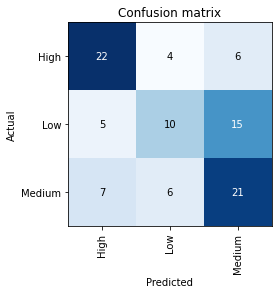

In [ ]:
from google.colab import files
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
plt.savefig('confusionmatrix2.png')
files.download('confusionmatrix2.png')

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
learn.fit_one_cycle(5, 3e-5)

epoch,train_loss,valid_loss,accuracy,time
0,2.587138,2.041600,0.187500,01:50
1,2.670662,1.973483,0.197917,00:03
2,2.667472,1.935776,0.281250,00:03
3,2.623023,1.962516,0.229167,00:03
4,2.616668,1.967270,0.229167,00:03


In [ ]:
import pandas as pd

In [ ]:
all_data_with_nl = pd.read_csv('/content/drive/MyDrive/all_data_with_nightlight.csv')

In [ ]:
all_data_with_nl

,Unnamed: 0,1,HV001,cluster_lat,cluster_lon,HV270,nightlights,nl_class
0,0,0,1.0,27.090887,-13.417127,3.0,0.917380,Medium
1,1,1,2.0,27.157745,-13.189701,5.0,4.769447,Medium
2,2,2,3.0,26.742351,-11.681967,4.0,1.443238,Medium
3,3,3,4.0,26.762514,-11.652784,3.0,1.443238,Medium
4,4,4,5.0,29.170336,-9.718877,4.0,0.258637,Low
...,...,...,...,...,...,...,...,...
475,475,475,476.0,35.546190,-5.927997,2.0,0.879955,Medium
476,476,476,477.0,35.670837,-5.715699,1.0,5.836636,Medium
477,477,477,478.0,35.529244,-5.290912,2.0,7.748456,High
478,478,478,479.0,35.690778,-5.483037,3.0,0.418339,Medium


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

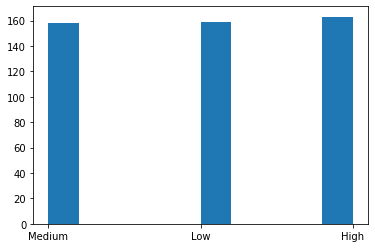

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
plt.hist(all_data_with_nl['nl_class'])
plt.savefig('hist.png')
files.download('hist.png')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(all_data_with_nl['nl_class'])
all_data_with_nl['nl_class_enc'] = encoder.transform(all_data_with_nl['nl_class'])

In [ ]:
all_data_with_nl

,Unnamed: 0,1,HV001,cluster_lat,cluster_lon,HV270,nightlights,nl_class,nl_class_enc
0,0,0,1.0,27.090887,-13.417127,3.0,0.917380,Medium,2
1,1,1,2.0,27.157745,-13.189701,5.0,4.769447,Medium,2
2,2,2,3.0,26.742351,-11.681967,4.0,1.443238,Medium,2
3,3,3,4.0,26.762514,-11.652784,3.0,1.443238,Medium,2
4,4,4,5.0,29.170336,-9.718877,4.0,0.258637,Low,1
...,...,...,...,...,...,...,...,...,...
475,475,475,476.0,35.546190,-5.927997,2.0,0.879955,Medium,2
476,476,476,477.0,35.670837,-5.715699,1.0,5.836636,Medium,2
477,477,477,478.0,35.529244,-5.290912,2.0,7.748456,High,0
478,478,478,479.0,35.690778,-5.483037,3.0,0.418339,Medium,2


In [ ]:
##Enconding the classes
all_data_with_nl.loc[all_data_with_nl['nl_class'] == 'High','nl_class_enc'] = 3
all_data_with_nl.loc[all_data_with_nl['nl_class'] == 'Medium','nl_class_enc'] = 2
all_data_with_nl.loc[all_data_with_nl['nl_class'] == 'Low','nl_class_enc'] = 1
corr=all_data_with_nl['HV270'].corr(all_data_with_nl['nl_class_enc'])
print("Correlation between nightlight classes and economic activity levels is : " ,corr)

Correlation between nightlight classes and economic activity levels is :  0.5740534331706977


0.5740534331706977


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

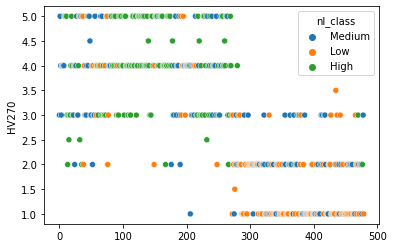

In [ ]:
from google.colab import files
import seaborn as sns
sns_plot = sns.scatterplot(data=all_data_with_nl, x=all_data_with_nl.index, y='HV270', hue='nl_class')
fig = sns_plot.get_figure()
fig.savefig("correlation.png")
files.download('correlation.png')
plt.show()